In [ ]:
pip install pycrypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 446 kB 7.4 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=014dcce5fc13c96f5b3ad47c024714879fd9c50bc0aeeb27b0843d861ae93ccd
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [ ]:
pip install base32hex  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for base32hex: filename=base32hex-1.0.2-py3-none-any.whl size=2270 sha256=a353a220d770f899cc405ef7192fbe30e360c1c069d6106e798735dd79a5fe11
  Stored in directory: /root/.cache/pip/wheels/6a/40/74/a70cdb7002e00447249a355fcc114543c9c5f5e0475f13a1b8
Successfully built base32hex


In [ ]:
import base32hex
import hashlib
from Crypto.Cipher import DES
import psutil
import time

start = time.time()

def DES():
  from Crypto.Cipher import DES

  def pad(text):
    n=len(text)%8
    return text+(b' '*n)

  key=b'hello123'
  text1=b'I am keerthi    '

  des=DES.new(key, DES.MODE_ECB)

  padded_text=pad(text1)
  encrypted_text=des.encrypt(padded_text)
  print(f"Encrypted Text: {encrypted_text}")
  print(f"Decrypted Text: {des.decrypt(encrypted_text)}")

DES()


end = time.time()
print("\n")
print(f"Runtime for DES encryption and decryption: {end - start}")
print(f"CPU Usage: {psutil.cpu_percent()}")
print(f"RAM Usage: {psutil.virtual_memory().percent}")


Encrypted Text: b'\x1eD\xd7\xcfx\xf3f\xd2\xc8)\xfbU#\xb3$\xf3'
Decrypted Text: b'I am keerthi    '


Runtime for DES encryption and decryption: 0.0056018829345703125
CPU Usage: 5.5
RAM Usage: 9.3


In [ ]:
start1 = time.time()

def AES():
  from Crypto.Cipher import AES
  obj = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')
  message = "I am keerthi    "
  ciphertext = obj.encrypt(message)
  print(ciphertext)
  obj2 = AES.new('This is a key123', AES.MODE_CBC, 'This is an IV456')
  print(obj2.decrypt(ciphertext))

AES()


end1 = time.time()
print("\n")
print(f"Runtime for AES encryption and decryption: {end1 - start1}")
print(f"CPU Usage: {psutil.cpu_percent()}")
print(f"RAM Usage: {psutil.virtual_memory().percent}")

b'\x92\xfc\xfb\xe3\xbb\x04\x10\xb7\xce\xb3.e<\xc8T\x8f'
b'I am keerthi    '


Runtime for AES encryption and decryption: 0.0039560794830322266
CPU Usage: 3.9
RAM Usage: 9.3


In [ ]:
start2 = time.time()

from Crypto.Cipher import DES3
from Crypto import Random
key = 'Sixteen byte key'
iv = Random.new().read(DES3.block_size) #DES3.block_size==8
cipher_encrypt = DES3.new(key, DES3.MODE_OFB, iv)
plaintext = 'I am keerthi    ' #padded with spaces so than len(plaintext) is multiple of 8
msg1=encrypted_text = cipher_encrypt.encrypt(plaintext)

cipher_decrypt = DES3.new(key, DES3.MODE_OFB, iv) #you can't reuse an object for encrypting or decrypting other data with the same key.
msg2=cipher_decrypt.decrypt(encrypted_text)
print(msg1)
print(msg2)


end2 = time.time()
print("\n")
print(f"Runtime for 3DES encryption and decryption: {end2 - start2}")
print(f"CPU Usage: {psutil.cpu_percent()}")
print(f"RAM Usage: {psutil.virtual_memory().percent}")

b':J\xa4\x19\x16\xe4\x99\xd7\x06\xd5\x1e^&v1s'
b'I am keerthi    '


Runtime for 3DES encryption and decryption: 0.0042722225189208984
CPU Usage: 4.4
RAM Usage: 9.3


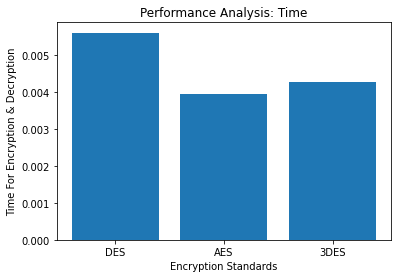

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Encryption Standards')
plt.ylabel('Time For Encryption & Decryption')
plt.title('Performance Analysis: Time')
Encryption_Standard = ['DES', 'AES', '3DES']
Time_Taken = [end-start, end1-start1, end2-start2]
plt.bar(Encryption_Standard,Time_Taken)
plt.show()

AVALANCHE EFFECT - GRAPHICAL ANALYSIS

DES Avalanche Effect
--DES--
Maximum Hamming Distance in DES:  47
Maximum Hamming Distance in DES:  0
Mean DES:  27.8482
Standard Deviation DES:  11.335749056884952


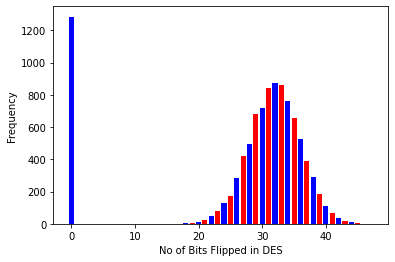



3DES Avalanche Effect
--3DES--
Maximum Hamming Distance in 3DES:  48
Minimum Hamming Distance in 3DES:  0
Mean 3DES:  27.9247
Standard Deviation 3DES:  11.393279185162589


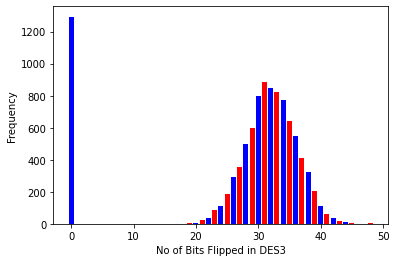



AES Avalanche Effect
--AES--
Maximum Hamming Distance in AES:  156
Minimum Hamming Distance in AES:  95
Mean AES:  127.9918
Standard Deviation AES:  7.906452046170636


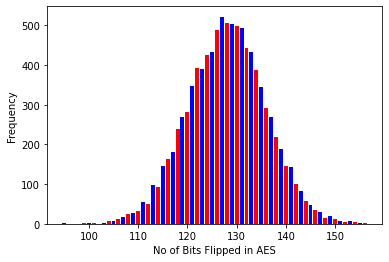

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
import itertools
import time
from Crypto.Cipher import DES
from Crypto.Cipher import DES3
from Crypto.Cipher import AES

sysrandom = random.SystemRandom()

#Initialize a randomArray to get 10000 Key
randKeyArray = []

#Calculate Hamming distance
def HammingDistance(bits0,bits1):
    #print('bits0: {:016x}'.format(bits0))
    #print('bits1: {:016x}'.format(bits1))
    return bin(bits0 ^ bits1).count("1")

print("DES Avalanche Effect")

def randomBitFlip(bits0):
    #print('bits0: {:016x}'.format(bits0))
    bitnum = random.randint(0,63)
    bits1 = bits0 ^ (1 << bitnum)
    randKeyArray.append(bits1)

randKeyArray.append(sysrandom.getrandbits(64))



#Create 10000 key which differ only by one bit
for i in range(0,10000):
    randomBitFlip(randKeyArray[i])

hamming_d = []

plaintext = '12345678'

for i in range(0,10000):
    
    des1 = DES.new(randKeyArray[i].to_bytes(8,'little'), DES.MODE_ECB)
    des2 = DES.new(randKeyArray[i+1].to_bytes(8,'little'), DES.MODE_ECB)
   
    ciphertext1 = des1.encrypt(plaintext)
    ciphertext2 = des2.encrypt(plaintext)
    #print(ciphertext1);
    #print(ciphertext2);
    #type(ciphertext1)
    d = HammingDistance(int.from_bytes(ciphertext1,'little'),int.from_bytes(ciphertext2,'little'))    
    hamming_d.append(d)

print("--DES--")
print("Maximum Hamming Distance in DES: ", max(hamming_d))
print("Maximum Hamming Distance in DES: ", min(hamming_d))
print("Mean DES: ",statistics.mean(hamming_d))
print("Standard Deviation DES: ",statistics.stdev(hamming_d))

#Plot an histogram to show the frequrncy of the bits change

np_hamming_d = np.array(hamming_d)

uniqueVal_des, occurCount_des = np.unique(np_hamming_d, return_counts=True)


x = uniqueVal_des
y = occurCount_des
colors = itertools.cycle(['b','r'])
plt.ylabel('Frequency')
plt.xlabel('No of Bits Flipped in DES')
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

print("\n") 
print("3DES Avalanche Effect")

def randomBitFlip_3DES(bits0):
    #print('bits0: {:016x}'.format(bits0))
    bitnum = sysrandom.randint(0,127)
    bits1 = bits0 ^ (1 << bitnum)
    randKeyArray_3DES.append(bits1)

randKeyArray_3DES = []

randKeyArray_3DES.append(sysrandom.getrandbits(128))


for i in range(0,10000):
    randomBitFlip_3DES(randKeyArray_3DES[i])


hamming_d_t = []

for i in range(0,10000):
    tdes1 = DES3.new(randKeyArray_3DES[i].to_bytes(16,'little'),DES.MODE_ECB)
    tdes2 = DES3.new(randKeyArray_3DES[i+1].to_bytes(16,'little'),DES.MODE_ECB)
    
    tciphertext1 = tdes1.encrypt(plaintext)
    tciphertext2 = tdes2.encrypt(plaintext)
    
    d = HammingDistance(int.from_bytes(tciphertext1,'little'),int.from_bytes(tciphertext2,'little'))    
    hamming_d_t.append(d)    

print("--3DES--")
print("Maximum Hamming Distance in 3DES: ",max(hamming_d_t))
print("Minimum Hamming Distance in 3DES: ",min(hamming_d_t))
print("Mean 3DES: ",statistics.mean(hamming_d_t))
print("Standard Deviation 3DES: ",statistics.stdev(hamming_d_t))

np_hamming_d_t = np.array(hamming_d_t)

uniqueVal_3des, occurCount_3des = np.unique(np_hamming_d_t, return_counts=True)


x = uniqueVal_3des
y = occurCount_3des
colors = itertools.cycle(['b','r'])
plt.ylabel('Frequency')
plt.xlabel('No of Bits Flipped in DES3')
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

print("\n") 
print("AES Avalanche Effect")

def randomBitFlip_3DES(bits0):
    #print('bits0: {:016x}'.format(bits0))
    bitnum = sysrandom.randint(0,127)
    bits1 = bits0 ^ (1 << bitnum)
    randKeyArray_3DES.append(bits1)

randKeyArray_3DES = []

randKeyArray_3DES.append(sysrandom.getrandbits(128))


for i in range(0,10000):
    randomBitFlip_3DES(randKeyArray_3DES[i])


hamming_A_t = []
plaintextA="12345678910111213141516171819202"

for i in range(0,10000):
    aes1 = AES.new(randKeyArray_3DES[i].to_bytes(16,'little'),AES.MODE_ECB)
    aes2 = AES.new(randKeyArray_3DES[i+1].to_bytes(16,'little'),AES.MODE_ECB)

    aciphertext1 = aes1.encrypt(plaintextA)
    aciphertext2 = aes2.encrypt(plaintextA)
    
    d = HammingDistance(int.from_bytes(aciphertext1,'little'),int.from_bytes(aciphertext2,'little'))    
    hamming_A_t.append(d)    

print("--AES--")
print("Maximum Hamming Distance in AES: ",max(hamming_A_t))
print("Minimum Hamming Distance in AES: ",min(hamming_A_t))
print("Mean AES: ",statistics.mean(hamming_A_t))
print("Standard Deviation AES: ",statistics.stdev(hamming_A_t))

np_hamming_A_t = np.array(hamming_A_t)

uniqueVal_aes, occurCount_aes = np.unique(np_hamming_A_t, return_counts=True)


x = uniqueVal_aes
y = occurCount_aes
colors = itertools.cycle(['b','r'])
plt.ylabel('Frequency')
plt.xlabel('No of Bits Flipped in AES')
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()


#Comparison in Avalanche effect between 3DES and DES and AES
#Plotting both graph simultaneously
#des_and_3des_and_aes = np.column_stack((np_hamming_d,np_hamming_d_t,np_hamming_A_t))

#colors = ['red', 'blue','green']
#labels = ['DES','3DES','AES']

#Lbins = [31,34]

#print("\n")
#plt.hist(des_and_3des_and_aes, Lbins,histtype='bar',stacked=False,label = labels,fill=True,alpha=0.8, # opacity of the barsedgecolor = "k")
#plt.xlabel('Bits Flipped With 1 bit change in key')
#plt.ylabel('Frequency')   
#plt.legend()
#plt.show()


In [ ]:
a = 546313 # first_cipher
b = 37385 # second_cipher after chanage one bit
# print bitwise XOR operation
a_xor_b = a ^ b
print("a ^ b =", a_xor_b)
# Base 2(binary)
bin_a_xor_b = bin(a_xor_b)
print("the result in decimal =", bin_a_xor_b)
# next steps to count 1s in binary number
one_count = 0
for i in bin_a_xor_b:
  if(i == "1"):
    one_count+=1
    print ("the 1s numbers is=", one_count)
  # next steps to calculate equation of avalanche effect
  len_a = len(bin(a))
  len_b = len(bin(b))
  # if to ensure divide by the longest binary string
  if(len_a) >= (len_b):
    AVA = (one_count/ len (bin(a))) * 100
  else:
    AVA = (one_count/ len (bin(b))) * 100
    print ("avalanche effect =", AVA, "%")

a ^ b = 574464
the result in decimal = 0b10001100010000000000
the 1s numbers is= 1
the 1s numbers is= 2
the 1s numbers is= 3
the 1s numbers is= 4
